In [1]:
import warnings
warnings.simplefilter('ignore')

import os
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

import folium

In [2]:
path = os.getcwd() + '/train/'

# 雨量のデータの読み込み
rain_data = pd.read_csv(path+'rainfall/data.csv')
rain_stations = pd.read_csv(path+'rainfall/stations.csv')
print('shapeの確認')
print('雨量観測データ: ', rain_data.shape)
print('雨量観測データ所: ', rain_stations.shape)

# 潮位のデータの読み込み
tide_data = pd.read_csv(path+'tidelevel/data.csv')
tide_stations = pd.read_csv(path+'tidelevel/stations.csv')
print('潮位観測データ: ', tide_data.shape)
print('潮位観測データ所: ', tide_stations.shape)

# 水位のデータの読み込み
water_data = pd.read_csv(path+'waterlevel/data.csv')
water_stations = pd.read_csv(path+'waterlevel/stations.csv')
print('水位観測データ: ', water_data.shape)
print('水位観測データ所: ', water_stations.shape)

# damデータの読み込み
dam = pd.read_csv(path+'dam.csv')
print('damデータ: ', dam.shape)

shapeの確認
雨量観測データ:  (896003, 27)
雨量観測データ所:  (313, 11)
潮位観測データ:  (28483, 27)
潮位観測データ所:  (13, 10)
水位観測データ:  (392066, 27)
水位観測データ所:  (180, 12)
damデータ:  (12, 21)


In [3]:
# 重複行を削除
rain_data = rain_data.drop_duplicates()

# 2191日分のデータがある観測所のリスト
stations = rain_data.groupby(['station', 'city']).count()['date'].reset_index()
stations = stations.loc[stations['date']==2191, 'station'].unique()

rain_stations = rain_stations[rain_stations['観測所名称'].isin(stations)]

観測所を地図上にプロットしていく

In [6]:
map = folium.Map(location=['34.5447', '132.8134'], zoom_start=10, tiles='OpenStreetMap')
water_station = water_stations.dropna(subset=['緯度', '経度'])

for i in range(len(water_station)):
    if water_station.iloc[i]['観測所名称'] not in ['向原', '和木']:
        continue
    folium.Circle(radius=150, location=[water_station.iloc[i]['緯度'], water_station.iloc[i]['経度']],
                  tooltip=str(water_station.iloc[i]['観測所名称'] + ' (' + water_station.iloc[i]['フリガナ'] + ')'),
                  color='red', fill=False).add_to(map)

# rain_station = rain_stations.dropna(subset=['緯度', '経度'])
# for i in range(len(rain_station)):
#     folium.Circle(radius=150, location=[rain_station.iloc[i]['緯度'], rain_station.iloc[i]['経度']],
#                   tooltip=str(rain_station.iloc[i]['観測所名称'] + ' (' + rain_station.iloc[i]['フリガナ'] + ')'),
#                   color='blue', fill=False).add_to(map)

# tide_station = tide_stations.dropna(subset=['緯度', '経度'])
# for i in range(len(tide_station)):
#     folium.Circle(radius=150, location=[tide_station.iloc[i]['緯度'], tide_station.iloc[i]['経度']],
#                   tooltip=str(tide_station.iloc[i]['観測所名'] + ' (' + tide_station.iloc[i]['ふりがな'] + ')'),
#                   color='green', fill=False).add_to(map)

dams = dam.dropna(subset=['緯度', '経度'])
for i in range(len(dams)):
    folium.Circle(radius=150, location=[dam.iloc[i]['緯度'], dam.iloc[i]['経度']],
                  tooltip=str(dam.iloc[i]['ダム名']),
                  color='black', fill=False).add_to(map)

map

In [17]:
rain_data.head()

,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,栗谷,大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,大竹市,大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,弥栄ダム(国),大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,湯船(国),大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,大竹(気),大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,栗谷,大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,大竹市,大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,弥栄ダム(国),大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,湯船(国),大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,大竹(気),大竹市,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895998,2190,上豊松,神石高原町,M,M,M,M,M,M,M,...,M,M,M,M,M,M,M,M,M,M
895999,2190,米見山,神石高原町,M,M,M,M,M,M,M,...,M,M,M,M,M,M,M,M,M,M
896000,2190,時安(国),神石高原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896001,2190,高蓋(国),神石高原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
rain_stations

,観測所名称,フリガナ,市町,水系名,河川名,データ所管,住所,緯度,経度,事務所,入力時使用
0,西部建設,セイブケンセツ,広島市南区,太田川,京橋川,河川課,広島市南区比治山本町１６－１２ 西部建設事務所内,34.381667,132.466667,NaN,1
1,上瀬野,カミセノ,広島市安芸区,瀬野川,瀬野川,河川課,広島市安芸区上瀬野瀬野川公園内,34.428333,132.618056,NaN,1
2,熊野町,クマノチョウ,熊野町,二河川,二河川,河川課,安芸郡熊野町３８１５－１ 熊野町役場内,34.338889,132.568056,NaN,1
3,江波,エバ,広島市中区,太田川,天満川,砂防課,広島市中区江波西１丁目１番１３号,34.373111,132.435833,NaN,1
4,福木,フクギ,広島市東区,太田川,小河原川,砂防課,広島市東区馬木９丁目１－２,34.445472,132.535833,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
308,内黒山(気),ウチグロヤマ,NaN,太田川,柴木川,気象台,山県郡安芸太田町大字横川字横川東平,34.591713,132.147980,安芸太田支所,1
309,都志見(気),ツシミ,NaN,太田川,吉木川,気象台,山県郡北広島町都志見,34.647644,132.429581,安芸太田支所,1
310,王泊(気),オオドマリ,NaN,太田川,滝山川,気象台,山県郡北広島町細見,34.729439,132.314102,安芸太田支所,1
311,八幡(気),ヤハタ,NaN,太田川,柴木川,気象台,山県郡北広島町東八幡原,34.709293,132.178879,安芸太田支所,1


In [15]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392066 entries, 0 to 392065
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      392066 non-null  int64 
 1   station   392066 non-null  object
 2   river     392066 non-null  object
 3   00:00:00  392063 non-null  object
 4   01:00:00  392063 non-null  object
 5   02:00:00  392063 non-null  object
 6   03:00:00  392063 non-null  object
 7   04:00:00  392063 non-null  object
 8   05:00:00  392063 non-null  object
 9   06:00:00  392063 non-null  object
 10  07:00:00  392063 non-null  object
 11  08:00:00  392063 non-null  object
 12  09:00:00  392063 non-null  object
 13  10:00:00  392063 non-null  object
 14  11:00:00  392063 non-null  object
 15  12:00:00  392066 non-null  object
 16  13:00:00  392066 non-null  object
 17  14:00:00  392066 non-null  object
 18  15:00:00  392066 non-null  object
 19  16:00:00  392066 non-null  object
 20  17:00:00  392066 non-null 

観測データがobject型ということは、数字以外のデータがある？また観測所によって数値のスケールが異ならないか？

データ型について

In [16]:
# pd.to_numeric()のerrors='coerce'で数値に変換できなかったデータはNaNにしている
# 数値データ以外に何が含まれるか確認
water_data[pd.to_numeric(water_data['00:00:00'], errors='coerce').notna()==False]['00:00:00'].unique()

array(['*', 'M', '-', nan], dtype=object)

In [17]:
# 数値データ以外をNaNで統一する
for i in range(24):
    water_data[f'{str(i).zfill(2)}:00:00'] = pd.to_numeric(water_data[f'{str(i).zfill(2)}:00:00'], errors='coerce')

In [18]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392066 entries, 0 to 392065
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      392066 non-null  int64  
 1   station   392066 non-null  object 
 2   river     392066 non-null  object 
 3   00:00:00  370186 non-null  float64
 4   01:00:00  370608 non-null  float64
 5   02:00:00  368683 non-null  float64
 6   03:00:00  370073 non-null  float64
 7   04:00:00  370695 non-null  float64
 8   05:00:00  370859 non-null  float64
 9   06:00:00  370795 non-null  float64
 10  07:00:00  370453 non-null  float64
 11  08:00:00  370076 non-null  float64
 12  09:00:00  366521 non-null  float64
 13  10:00:00  361811 non-null  float64
 14  11:00:00  359807 non-null  float64
 15  12:00:00  359938 non-null  float64
 16  13:00:00  360134 non-null  float64
 17  14:00:00  359629 non-null  float64
 18  15:00:00  360883 non-null  float64
 19  16:00:00  362531 non-null  float64
 20  17:0

データのスケールについて

In [19]:
# 日にちは0~2190で2191日分のデータ
print(water_data['date'].min(), water_data['date'].max())

0 2190


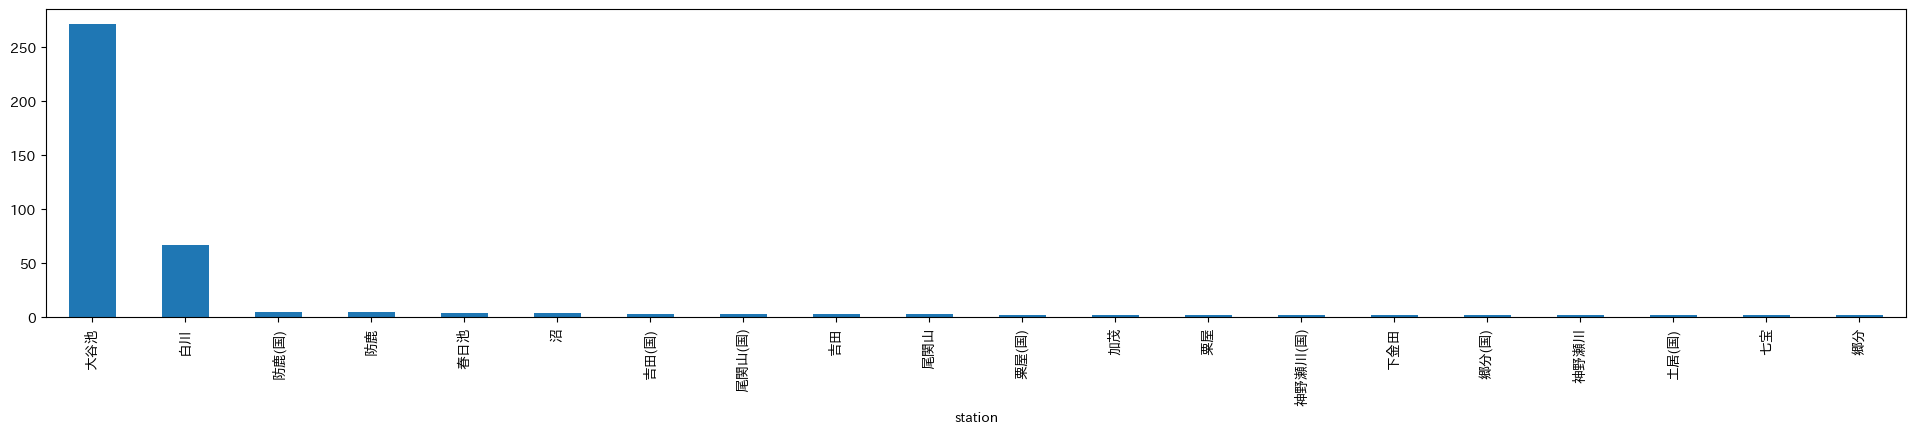

station
大谷池        271.962694
白川          67.300383
防鹿(国)        4.815837
防鹿           4.692171
春日池          3.927141
沼            3.592221
吉田(国)        2.849563
尾関山(国)       2.800073
吉田           2.721617
尾関山          2.595102
粟屋(国)        2.194695
加茂           2.175846
粟屋           2.064698
神野瀬川(国)      1.827368
下金田          1.789932
郷分(国)        1.762033
神野瀬川         1.710664
土居(国)        1.689172
七宝           1.670031
郷分           1.595430
dtype: float64

In [20]:
# 水位の観測地点ごとの平均をプロット（上位20地点）
plt.figure(figsize=(24, 4))
water_data.drop(['date', 'river'], axis=1).groupby('station').mean().mean(axis=1).sort_values(ascending=False).iloc[:20].plot.bar()
plt.show()

water_data.drop(['date', 'river'], axis=1).groupby('station').mean().mean(axis=1).sort_values(ascending=False).iloc[:20]

本郷(廿日市)と防鹿(国)では水位の平均に大きな差がある  
water_stationsのデータから入力時使用かつ評価対象であることを確認し、本郷(廿日市)と防鹿(国)の1日単位での平均水位を可視化

In [21]:
water_stations[water_stations['観測所名称']=='本郷(廿日市)']

,観測所名称,フリガナ,水系名,河川名,事務所,市町,データ所管,住所,緯度,経度,入力時使用,評価対象
85,本郷(廿日市),ホンゴウ,小瀬川,小瀬川,廿日市支所,廿日市市,河川課\nダムG,廿日市市浅原字前中山１１１５番地の３,34.336389,132.133889,1,1


In [22]:
water_stations[water_stations['観測所名称']=='防鹿(国)']

,観測所名称,フリガナ,水系名,河川名,事務所,市町,データ所管,住所,緯度,経度,入力時使用,評価対象
148,防鹿(国),ボウロク,小瀬川,小瀬川,廿日市支所,大竹市,国ダム,大竹市小方町防鹿,34.226389,132.184722,1,1


In [23]:
water_data['mean'] = water_data[water_data.columns[3:]].mean(axis=1)
bouroku_water = water_data[water_data['station']=='防鹿(国)'][['date', 'mean']].set_index('date')
hongou_water = water_data[water_data['station']=='本郷(廿日市)'][['date', 'mean']].set_index('date')

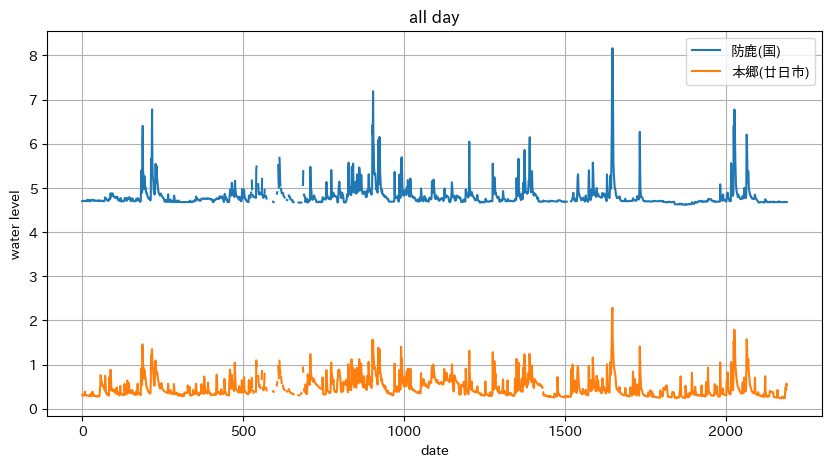

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(bouroku_water, label='防鹿(国)')
plt.plot(hongou_water, label='本郷(廿日市)')
plt.title('all day')
plt.xlabel('date')
plt.ylabel('water level')
plt.legend()
plt.grid()
plt.show()

観測所（観測する川）によって水位のスケールは時期に関係なく異なる様子。  
また多少周期性が見られそう。  
1年単位で確認。

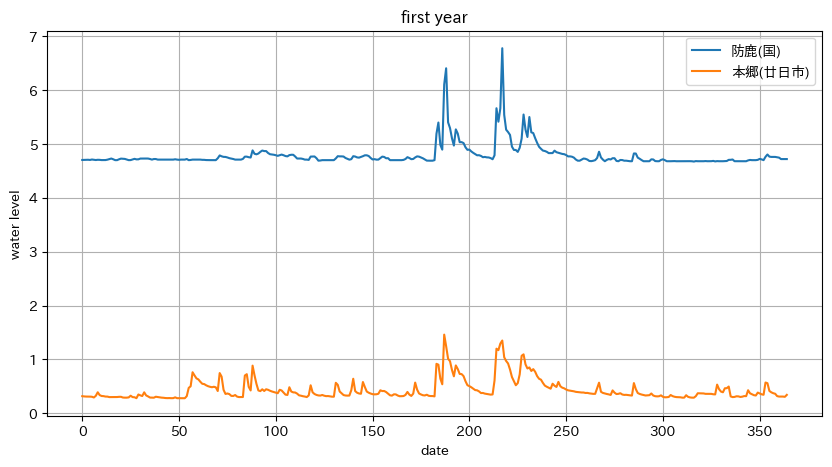

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(bouroku_water[:365], label='防鹿(国)')
plt.plot(hongou_water[:365], label='本郷(廿日市)')
plt.title('first year')
plt.xlabel('date')
plt.ylabel('water level')
plt.legend()
plt.grid()
plt.show()

date180~230の水位が上昇しているあたりが梅雨か

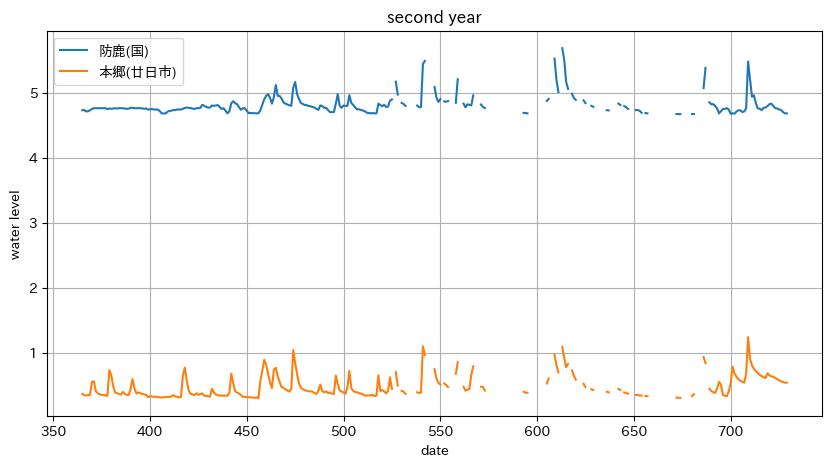

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(bouroku_water[365:730], label='防鹿(国)')
plt.plot(hongou_water[365:730], label='本郷(廿日市)')
plt.title('second year')
plt.xlabel('date')
plt.ylabel('water level')
plt.legend()
plt.grid()
plt.show()

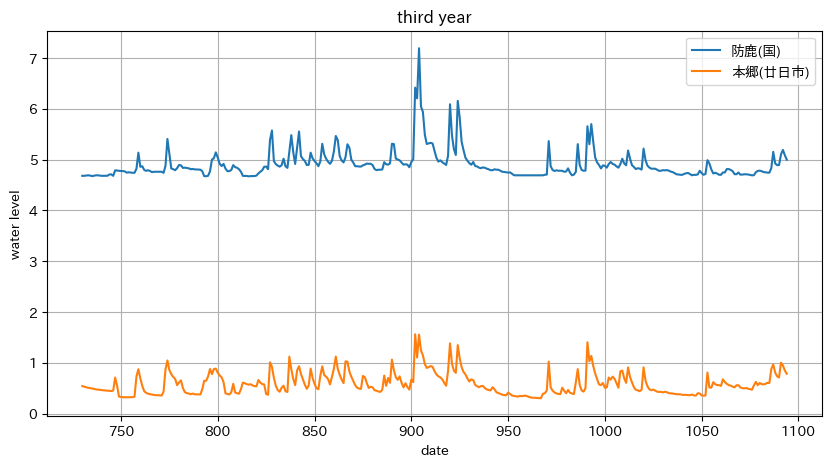

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(bouroku_water[730:1095], label='防鹿(国)')
plt.plot(hongou_water[730:1095], label='本郷(廿日市)')
plt.title('third year')
plt.xlabel('date')
plt.ylabel('water level')
plt.legend()
plt.grid()
plt.show()

緯度経度から観測所が近い雨量データと合わせてプロット

In [28]:
water_stations[water_stations['観測所名称']=='防鹿(国)']

,観測所名称,フリガナ,水系名,河川名,事務所,市町,データ所管,住所,緯度,経度,入力時使用,評価対象
148,防鹿(国),ボウロク,小瀬川,小瀬川,廿日市支所,大竹市,国ダム,大竹市小方町防鹿,34.226389,132.184722,1,1


In [29]:
# 場所が近いの大竹(気)の雨量でプロット
rain_stations[rain_stations['事務所']=='廿日市支所']

,観測所名称,フリガナ,市町,水系名,河川名,データ所管,住所,緯度,経度,事務所,入力時使用
283,大竹(気),オオタケ,NaN,その他,沿岸部,気象台,大竹市立戸,34.222763,132.218582,廿日市支所,1
284,廿日市津田(気),ハツカイチツタ,NaN,小瀬川,林川,気象台,廿日市市津田,34.370487,132.175842,廿日市支所,1


In [30]:
# 雨量データ前処理
for i in range(24):
    rain_data[f'{str(i).zfill(2)}:00:00'] = pd.to_numeric(rain_data[f'{str(i).zfill(2)}:00:00'], errors='coerce')

rain_data['mean'] = rain_data[rain_data.columns[3:]].mean(axis=1)
otake_rain = rain_data[rain_data['station']=='大竹(気)'][['date', 'mean']].set_index('date')

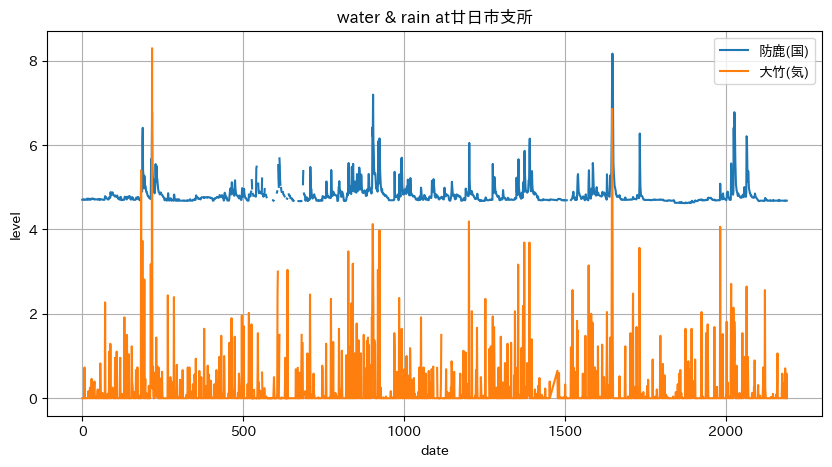

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(bouroku_water, label='防鹿(国)')
plt.plot(otake_rain, label='大竹(気)')
plt.title('water & rain at廿日市支所')
plt.xlabel('date')
plt.ylabel('level')
plt.legend()
plt.grid()
plt.show()

雨量と水位は相関がありそうなことを確認

# run.pyの挙動確認

### インプットデータ作成部

In [3]:
# groupbyでのループ
for data in water_data.groupby('date'):
    print(data[0])
    display(data[1][['date', 'station', 'river', '00:00:00']].head(3))
    if data[0]==1:
        break

0


,date,station,river,00:00:00
0,0,釜ヶ原,小瀬川,0.76
1,0,下ヶ原(国),小瀬川,0.71
2,0,防鹿(国),小瀬川,4.71


1


,date,station,river,00:00:00
179,1,釜ヶ原,小瀬川,0.76
180,1,下ヶ原(国),小瀬川,0.71
181,1,防鹿(国),小瀬川,4.7


In [4]:
# to_dictの挙動
# {列名: 値}を要素とするリストに変換。一行ごとに一つの辞書になる。
sample_df = pd.DataFrame({'date': [0, 0, 1, 1],
                          'station': ['A', 'B', 'A', 'B'],
                          'waterlevel':[1, 3, 2, 10]})
sample_dict = sample_df.to_dict('records')

display(sample_df)
print(sample_dict)

,date,station,waterlevel
0,0,A,1
1,0,B,3
2,1,A,2
3,1,B,10


[{'date': 0, 'station': 'A', 'waterlevel': 1}, {'date': 0, 'station': 'B', 'waterlevel': 3}, {'date': 1, 'station': 'A', 'waterlevel': 2}, {'date': 1, 'station': 'B', 'waterlevel': 10}]


In [5]:
start_date = 0
end_date = 10

stations = set(water_stations[water_stations['評価対象']==1]['観測所名称'])   # 評価対象の観測所
in_all_data = {}

for data in water_data.groupby('date'):
    day = data[0]
    if day < start_date:
        pass
    elif (day >= start_date) and (day <= end_date):
        # {列名: 値}を要素とするリストに変換。一行ごとに一つの辞書になる。
        data_dict = data[1].to_dict('records')
        in_data = []
        for d in data_dict:
            for k in d.keys():
                if k not in ('date', 'station', 'river'):
                    in_data.append({'station':d['station'], 'river':d['river'], 'hour':int(k.split(':')[0]), 'value':d[k]})
        in_all_data[day] = {}
        in_all_data[day]['date'] = day
        in_all_data[day]['stations'] = stations
        in_all_data[day]['waterlevel'] = in_data
    # 日にちがend_dateを超えたらループ終了
    elif day > end_date:
        break

In [9]:
print(type(in_all_data))
# print(in_all_data[0])

<class 'dict'>


### アウトプットデータ作成部

In [10]:
start_date_out = 1
end_date_out = 11

out_all_data = []
for data in water_data.groupby('date'):
    day = data[0]
    if day < start_date_out:
        pass
    elif (day >= start_date_out) and (day <= end_date_out):
        data_dict = data[1].to_dict('records')
        out_data = []
        for d in data_dict:
            if d['station'] in stations:
                for k in d.keys():
                    if k not in ('date', 'station', 'river'):
                        out_data.append({'date':d['date'], 'station':d['station'], 'hour':int(k.split(':')[0]), 'value':d[k]})
        out_all_data += out_data
    elif day > end_date_out:
        break

# out_all_dataを確認
print(type(out_all_data))
print(out_all_data[:3])

<class 'list'>
[{'date': 1, 'station': '釜ヶ原', 'hour': 0, 'value': '0.76'}, {'date': 1, 'station': '釜ヶ原', 'hour': 1, 'value': '0.76'}, {'date': 1, 'station': '釜ヶ原', 'hour': 2, 'value': '0.76'}]


In [11]:
out_all_data = pd.DataFrame(out_all_data)
out_all_data = out_all_data[(~out_all_data['value'].isin(['M', '*', '-', '--', '**']))&(~out_all_data['value'].isna())]
out_all_data['value'] = out_all_data['value'].astype(float)
print(type(out_all_data))
display(out_all_data.head(3))

<class 'pandas.core.frame.DataFrame'>


,date,station,hour,value
0,1,釜ヶ原,0,0.76
1,1,釜ヶ原,1,0.76
2,1,釜ヶ原,2,0.76
